# Exploratory Analysis of 911 Calls Statistics in Montgomery County, PA

The project is completed within the scope of MOOC [Python for Data Science and Machine Learning Bootcamp"](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp) as the first capstone project after the data exploration and vizualization sections. The studies are offered by the course instructor.

Language: Python;
Tools: Pandas, Seaborn

- - -
## Dataset

Emergency - 911 Calls in Montgomery County, PA,

Available at the [kaggle website](https://www.kaggle.com/mchirico/montcoalert)


In [1]:
import numpy as np
import pandas as pd

In [51]:
path='../../Python-Data-Science-and-Machine-Learning-Bootcamp/Data-Capstone-Projects/'
df = pd.read_csv(path+'911.csv')

## Start Exploration
#### Check general information and head of the dataset:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


- - - - - - - - - - - - - - - 
#### Check the top 5 zipcodes for 911 calls:

In [16]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

- - -
#### Check the top 5 townships (twn) for 911 calls:

In [17]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

- - -
#### How many unique title codes does the dataset have?

In [18]:
df['title'].nunique()

110

- - -
## Add new columns to study of call frequencies for different reasons depending on time of year / week / day

#### Group all titles into several reasons (EMS, Fire, etc.)

In [68]:
df['Reason']=df['title'].apply(lambda s: s.split(":")[0])

In [69]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

- - -
#### How many calls were received for each reason?

In [70]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

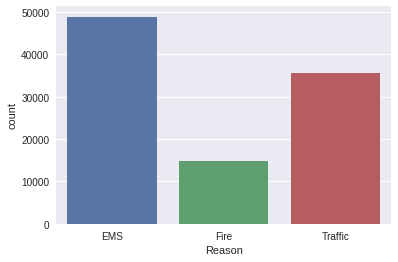

In [72]:
sns.countplot(x='Reason',data=df)

- - -
#### What about the timeStamp column?

In [52]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

#### Convert to datetime:

In [53]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [54]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [44]:
df['timeStamp'].iloc[0].today().weekday()

4

#### Add three new columns: Hour, Month, DayOfWeek:

In [64]:
df['Hour'] = df['timeStamp'].apply(lambda s: s.hour)
df['Month'] = df['timeStamp'].apply(lambda s: s.month)

#### And day of week:

In [65]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayOfWeek'] = df['timeStamp'].apply(lambda s: s.weekday())
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)
df['DayOfWeek'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: DayOfWeek, dtype: int64

- - - 
#### With the seaborn countplot, check number of calls for different resons depending on a week day and a month.

#### Week day:

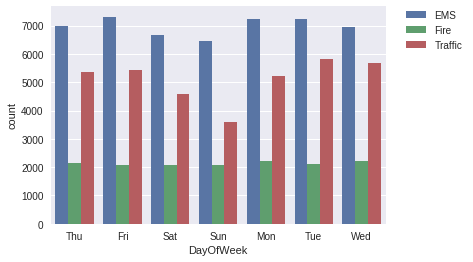

In [77]:
sns.countplot(x='DayOfWeek',data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Month:

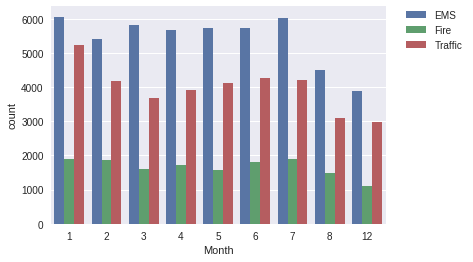

In [78]:
sns.countplot(x='Month',data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Comment: months 9-11 are missing...

- - -
## More in-depth by month studies

#### Create a new byMonth DataFrame using count() for aggregation:

In [93]:
byMonth = df.groupby('Month').count()

In [80]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,DayOfWeek,Hour,Reason
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


#### Plot a number of calls for each month:

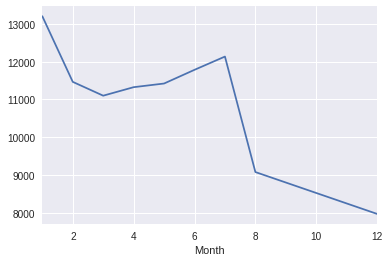

In [90]:
byMonth['e'].plot()

#### Reset index to a column and fit number of calls as a function of month

In [94]:
byMonth=byMonth.reset_index()
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,DayOfWeek,Hour,Reason
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


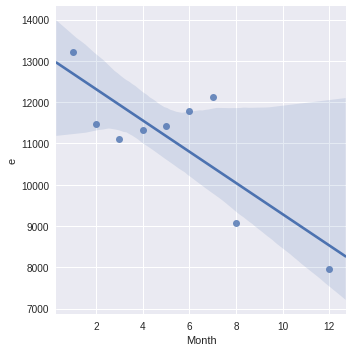

In [96]:
sns.lmplot(x='Month',y='e',data=byMonth)

#### Create a Date column:

In [97]:
df['Date']=df['timeStamp'].apply(lambda s: s.date())

In [98]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,DayOfWeek,Hour,Month,Reason,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,Thu,17,12,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thu,17,12,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Thu,17,12,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,Thu,17,12,EMS,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,Thu,17,12,EMS,2015-12-10


#### Prepare a new DataFrame byDate and plot a number of calls by date:

In [101]:
byDate = df.groupby('Date').count()

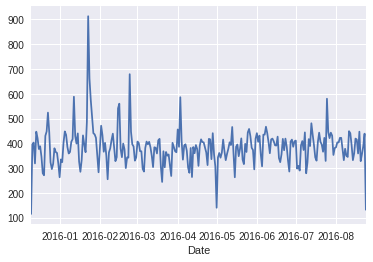

In [102]:
byDate['e'].plot()

#### Plot a number of calls by date separately for each reason:

In [108]:
byDate_Traffic = df[df['Reason']=='Traffic'].groupby('Date').count()
byDate_EMS = df[df['Reason']=='EMS'].groupby('Date').count()
byDate_Fire = df[df['Reason']=='Fire'].groupby('Date').count()

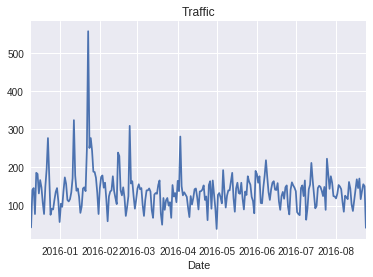

In [110]:
byDate_Traffic['e'].plot(title='Traffic')

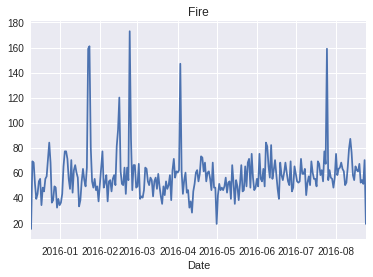

In [113]:
byDate_Fire['e'].plot(title='Fire')

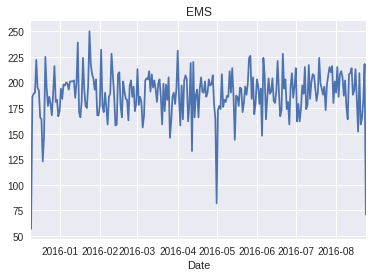

In [114]:
byDate_EMS['e'].plot(title='EMS')

- - -
## Now create heatmaps

#### Restructure the DataFrame so that columns become Hours and index becomes DayOfWeek:

In [142]:
dfHeat = df.groupby(by=['DayOfWeek','Hour']).count()

In [143]:
dfHeat.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Month  \
DayOfWeek Hour                                                                 
Fri       0     275  275   275  248    275        275  275   275  275    275   
          1     235  235   235  200    235        235  235   232  235    235   
          2     191  191   191  165    191        191  191   191  191    191   
          3     175  175   175  164    175        175  175   175  175    175   
          4     201  201   201  184    201        201  201   201  201    201   

                Reason  Date  
DayOfWeek Hour                
Fri       0        275   275  
          1        235   235  
          2        191   191  
          3        175   175  
          4        201   201

In [146]:
dfHeat2 = dfHeat['e'].unstack()
dfHeat2.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


#### Create a heatmap:

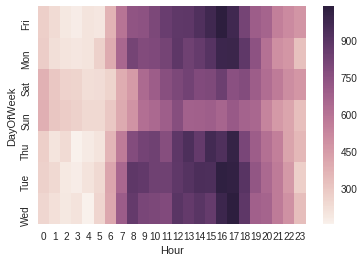

In [147]:
sns.heatmap(dfHeat2)

#### Create a clustermap:

/home/ekaterina/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


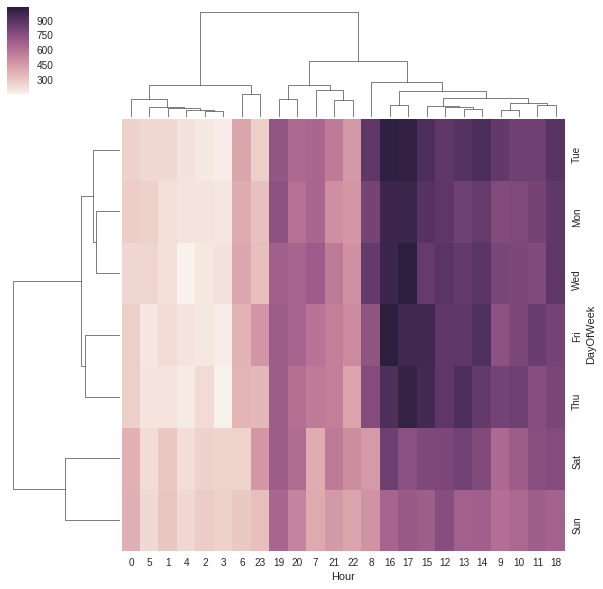

In [148]:
sns.clustermap(dfHeat2)

#### The same steps for month and day of week:

In [149]:
dfHeatMonth = df.groupby(by=['DayOfWeek','Month']).count()['e'].unstack()

In [150]:
dfHeatMonth.head()

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


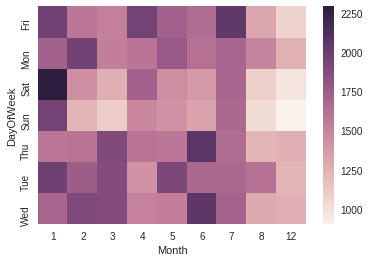

In [151]:
sns.heatmap(dfHeatMonth)

/home/ekaterina/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


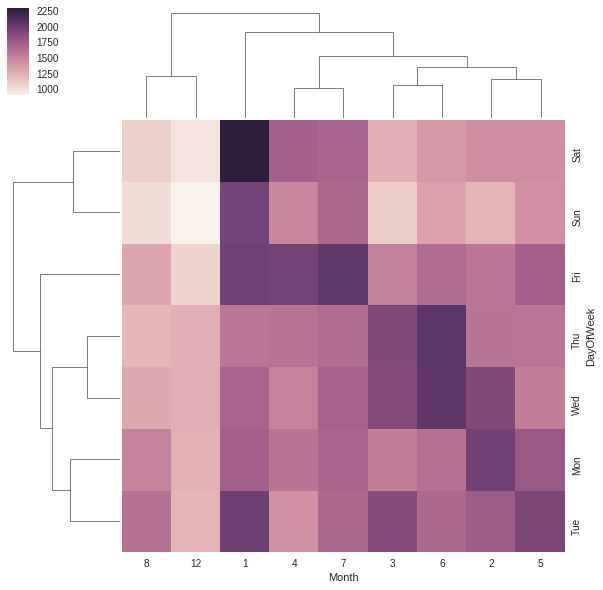

In [152]:
sns.clustermap(dfHeatMonth)